In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

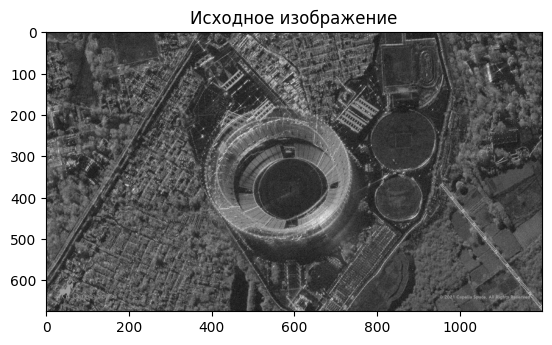

In [35]:
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.show()

In [36]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,   0,   3, ...,   0,   0,   0],
       [  0,   0,   0, ...,  90,  10,   0],
       [ 21,   0,   0, ...,  85,   0,   0],
       ...,
       [  0,   0,  23, ...,  63,   0,  65],
       [  0, 217,   0, ..., 149,   0,  22],
       [121,   0, 183, ...,  31,   0,  97]], dtype=uint8)

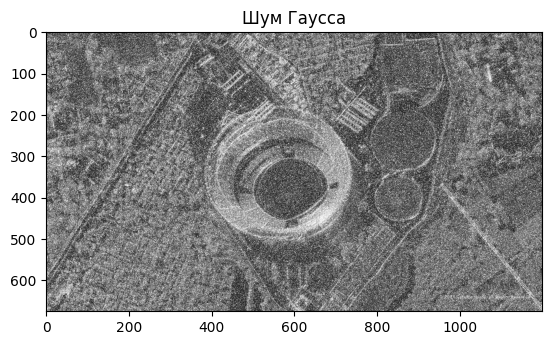

In [37]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)
plt.imshow(image_noise_gauss, cmap="gray")
plt.title("Шум Гаусса")
plt.show()

In [38]:
rows, cols = image_gray.shape
noisy = np.copy(image_gray)
salt_count = int(0.1 * image_gray.size)
pepper_count = int(0.1 * image_gray.size)

In [39]:
salt_row = np.random.randint(0, rows, size=salt_count)
salt_col = np.random.randint(0, cols, size=salt_count)
noisy[salt_row, salt_col] = 255

In [40]:
pepper_row = np.random.randint(0, rows, size=pepper_count)
pepper_col = np.random.randint(0, cols, size=pepper_count)
noisy[pepper_row, pepper_col] = 0

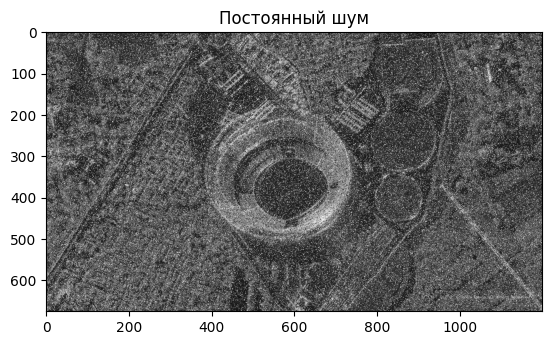

In [41]:
plt.imshow(noisy, cmap = "gray")
plt.title("Постоянный шум")
plt.show()

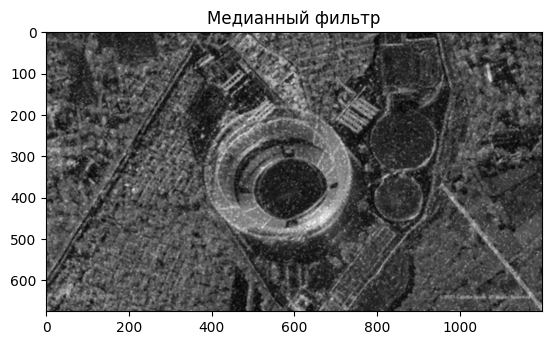

In [42]:
median_filtered = cv2.medianBlur(image_noise_gauss, 5)
plt.imshow(median_filtered, cmap = "gray")
plt.title("Медианный фильтр")
plt.show()

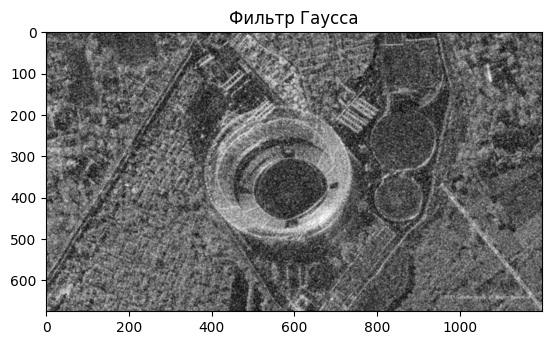

In [43]:
gaussian_filtered = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
plt.imshow(gaussian_filtered, cmap = "gray")
plt.title("Фильтр Гаусса")
plt.show()

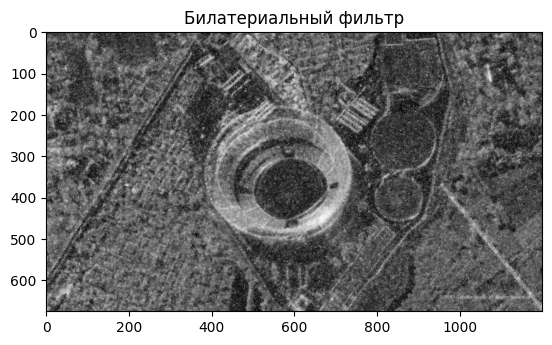

In [44]:
bilateral_filtered = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
plt.imshow(bilateral_filtered, cmap = "gray")
plt.title("Билатериальный фильтр")
plt.show()

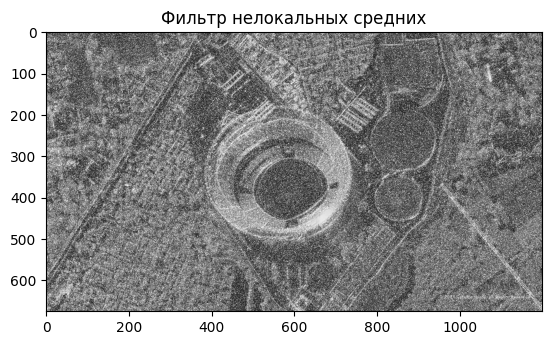

In [45]:
nlm_filtered = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
plt.imshow(nlm_filtered, cmap = "gray")
plt.title("Фильтр нелокальных средних")
plt.show()

In [46]:
def compute_psnr(ref_image, processed_image):
    error = mean_squared_error(ref_image, processed_image)
    if error == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(error))

# Словарь для хранения результатов PSNR для различных фильтров
psnr_values = {
    "Median Filter": compute_psnr(image_gray, median_filtered),
    "Gaussian Filter": compute_psnr(image_gray, gaussian_filtered),
    "Bilateral Filter": compute_psnr(image_gray, bilateral_filtered),
    "Non-Local Means Filter": compute_psnr(image_gray, nlm_filtered),
}

# Находим фильтр с наилучшим PSNR
optimal_filter = max(psnr_values, key=psnr_values.get)
optimal_psnr = psnr_values[optimal_filter]

# Выводим результаты PSNR для каждого фильтра
for filter_name, psnr in psnr_values.items():
    print(f"{filter_name}: PSNR = {psnr:.2f}")

print(f"Best filter: {optimal_filter} with PSNR = {optimal_psnr:.2f}")


Median Filter: PSNR = 19.66
Gaussian Filter: PSNR = 15.66
Bilateral Filter: PSNR = 15.48
Non-Local Means Filter: PSNR = 11.87
Best filter: Median Filter with PSNR = 19.66
